#  NREL - Offshore WA OR - turbine: 25915

## Predicción: h = 1 / H = 24

## Errores de primer y segundo momento de predicción.

Los errores asociados al **primer momento de predicción** (**BIAS** y **MAE**), y los de **segundo momento de predicción** (**RMSE** y **STD**), pueden ser calculados usando únicamente el "error de predicción"
o el "error de predicción de predicción normalizado".  El interes de usar el error de predicción normalizado es que produce errores independientes del tamaño del parque de aerogeneradores.

Se separa el notebook en dos apartados:

 * A) Errores de predicción.
 * B) Errores de predicción normalizado.

In [1]:
%matplotlib inline
import pandas as pd

### 1.-) Lod errors

In [2]:
dic_models_mse = {'persistencia' : [0.887501],
                  'k-nearest' : [0.9601426832488383],
                  'decision-tree' : [1.4185704929134642],
                  'mlp': [0.9597418274494136],
                  'lstm': [0.8167876982808187],
                  'stack lstm': [0.9613289626473819] }

In [3]:
dic_models_mae = {'persistencia' : [0.595239],
                  'k-nearest': [0.6138437896070975],
                  'decision-tree' : [0.626193593491266],
                  'mlp': [0.6129641344792035],
                  'lstm': [0.5562301339160354],
                  'stack lstm': [0.5649590854934866] }

In [4]:
df_mse_h1 = pd.DataFrame(dic_models_mse)
df_mae_h1 = pd.DataFrame(dic_models_mae)

In [5]:
df_mae_h1.T.sort_values(by=0)

,0
lstm,0.556230
stack lstm,0.564959
persistencia,0.595239
mlp,0.612964
k-nearest,0.613844
decision-tree,0.626194


## A) Errores de predicción.

### First moment of the prediction error

**BIAS** y **MAE** están asociado con el primer momento del error predicción, y son métricas de errores asociadas directamente con la producción de la energía. 

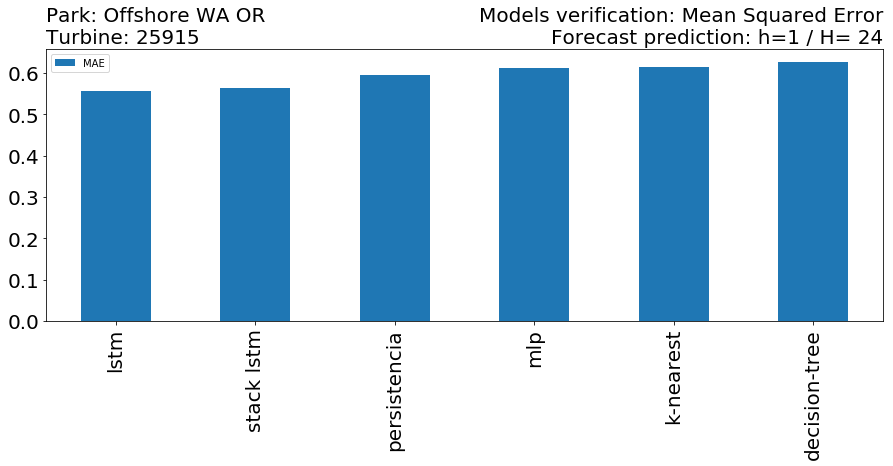

In [53]:
title_park_rotor= ('Park: Offshore WA OR\nTurbine: 25915')
title_plot = ('Models verification: Mean Squared Error\n \
               Forecast prediction: h=1 / H= 24')

ax = df_mae_h1.T.sort_values(by=0).plot(kind='bar',
                                        figsize=(15,5),
                                        #title = title,
                                        legend=False,
                                        fontsize=20)
ax.set_title(title_park_rotor, loc='left', fontsize=20)
ax.set_title(title_plot, loc='right', fontsize=20)
ax.legend(['MAE'])

In [54]:
df_mae_h1

,decision-tree,k-nearest,lstm,mlp,persistencia,stack lstm
0,0.626194,0.613844,0.55623,0.612964,0.595239,0.564959


### Second moment of the prediction error

**RMSE** y **STD** están asociado con el segundo momento del error, y están asociados con la varianza del error de predicción.

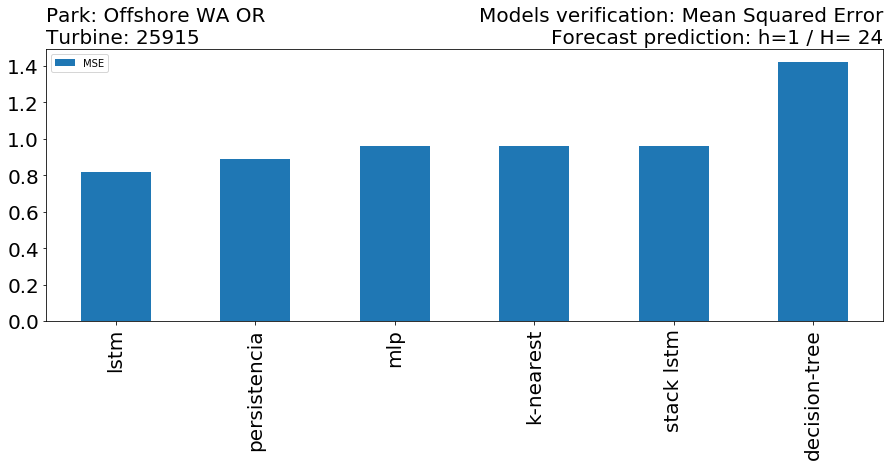

In [55]:
title_park_rotor= ('Park: Offshore WA OR\nTurbine: 25915')
title_plot = ('Models verification: Mean Squared Error\n \
               Forecast prediction: h=1 / H= 24')

ax = df_mse_h1.T.sort_values(by=0).plot(kind='bar',
                                        figsize=(15,5),
                                        #title = title,
                                        legend=False,
                                        fontsize=20)
ax.set_title(title_park_rotor, loc='left', fontsize=20)
ax.set_title(title_plot, loc='right', fontsize=20)
ax.legend(['MSE']);

In [56]:
df_mse_h1

,decision-tree,k-nearest,lstm,mlp,persistencia,stack lstm
0,1.41857,0.960143,0.816788,0.959742,0.887501,0.961329


## B) Errores de predicción normalizado.